In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython
import sklearn
import mglearn

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_moons

In [4]:
x, y = make_moons(n_samples = 100, noise = 0.25, random_state = 22294)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 22294)

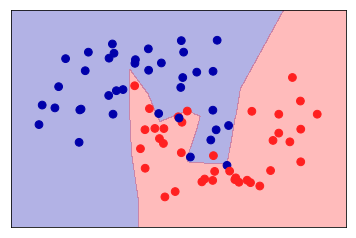

In [16]:
# Use 1 hiddel layer: 

mlp = MLPClassifier(solver='lbfgs', random_state=22294, hidden_layer_sizes=[10]).fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)


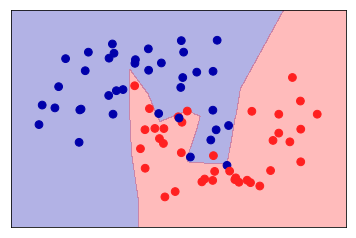

In [17]:
# Use two hidden layers with 10 units each:
mlp = MLPClassifier(solver='lbfgs', random_state=22294, hidden_layer_sizes=[10,10]).fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)


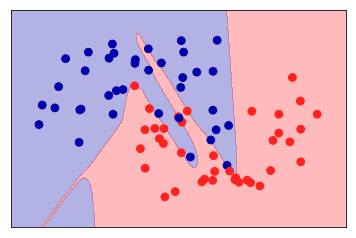

In [19]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity:

mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=22294, hidden_layer_sizes=[10, 10])
mlp.fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=60, cmap=mglearn.cm2)

*Try NN on breast cancer dataset*

In [31]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

In [33]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [34]:
print("accuracy on training set: %f" % mlp.score(x_train, y_train))
print("accuracy on test set: %f" % mlp.score(x_test, y_test))

accuracy on training set: 0.875587
accuracy on test set: 0.874126


In [35]:
# compute the mean value per feature on the training set
mean_on_train = x_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = x_train.std(axis=0)

In [36]:
# subtract the mean, scale by inverse standard deviation
# afterwards, mean=0 and std=1
x_train_scaled = (x_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
x_test_scaled = (x_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)

In [37]:
mlp.fit(x_train_scaled, y_train)
print("accuracy on training set: %f" % mlp.score(x_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(x_test_scaled, y_test))

accuracy on training set: 0.990610
accuracy on test set: 0.965035


C:\Users\mlcl.local\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


we might try to decrease the model complexity to get better
generalization performance. Here, we choose to increase the alpha parameter (quite
aggressively, from 0.0001 to 1), to add stronger regularization of the weights.

In [38]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(x_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [39]:
print("accuracy on training set: %f" % mlp.score(x_train_scaled, y_train))
print("accuracy on test set: %f" % mlp.score(x_test_scaled, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.972028
